# (3) Quick Interferometry Tutorial

To understand some of the subsequent steps in this project, it helps to learn a little bit about some of the practical details of how an interferometer like ALMA works.  This is a very brief, incomplete primer on the issues most directly applicable to your project.  I hope it serves as a reference as you internalize what you're doing in some of the remaining parts, but I'll also try and provide some links to more complete discussions if you're interested in learning more.  There are a number of presentations on radio astronomy and interferometry from the Submillimeter Array winter school, available [here](https://www.cfa.harvard.edu/sma-school/program/).  Also, the NRAO synthesis imaging summer school has both PDFs and videos available [here](https://science.nrao.edu/science/meetings/2018/16th-synthesis-imaging-workshop/16th-synthesis-imaging-workshop-lectures).  In both cases, I'd recommend some of the first "basics" presentations, and the "Imaging and Deconvolution" presentations.  Don't worry if you don't understand much of these things...they come over time and from experience.  But hopefully seeing things in this format can be helpful.

For an interferometer of radio antennas pointed at some location on the sky, each antenna measures an electric field induced by the intensity of the source.  At any time $t$, the detector (or "receiver") at antenna $i$ measures an amplitude $A_i$ and phase $\phi_i$ for that radiation-induced electric field: basically the measured signal is $\propto A_i \cos{(\phi_i t)}$.  For two antennas, $i$ and $j$, separated by a distance $D_{ij}$ (a "baseline" length), a plane-wave of radio emission from the source will reach the antennas at slightly different times.  That introduces a phase lag ($\phi_i \ne \phi_j$), depending on the elevation angle of the source and $D_{ij}$.  The phase lag can be re-cast in terms of a purely geometric time lag, or "delay", in the signal, $\tau_g$.  In this scenario, the signals from antennas $i$ and $j$ will be 

$V_i = A_i \cos{(2 \pi \nu t)}$

and

$V_j = A_j \cos{(2 \pi \nu [t + \tau_g])}$,

respectively.  These voltages are passed from the receiver, through a "mixer" (to properly transmit the signals), to a "correlator", which is the machinery that records the measurements.  The correlator cross-correlates the signals from antenna pairs, essentially multiplies and integrates over a given integration interval.  The correlator then records and outputs this signal, termed a "visibility", $\mathcal{V}$.  A visibility is a complex number: it has an amplitude and a phase, or (more commonly) a real and imaginary component.  Multiplying the two signals and time-averaging:

$\mathcal{V}_{ij} = \langle V_i V_j \rangle_t = \langle A_i A_j^\ast \cos{(2 \pi \nu t)} \cos{(2 \pi [\nu t + \nu \tau_g])} \rangle_t$

using a trigonometric identify for cosine products, we can re-write this as a sum of 2 cosine terms:

$\mathcal{V}_{ij} = \langle A_i A_j^\ast \frac{1}{2}\cos{(4 \pi \nu t)} \rangle_t + \langle A_i A_j^\ast \frac{1}{2}\cos{(2 \pi \nu \tau_g)} \rangle_t$.

The first of these terms averages to 0 over time.  Technically, what happens is somewhat more complicated, but this is the basic idea.  The visibility is constructed from a series of oscillatory functions, with phases ("fringe pattern") that depends on the geometric delay (or the antenna baseline projected onto the sky) and the frequency.  At any one time, a pair of antennas looking at a source with a given sky location samples information at a discrete pair of "spatial frequencies", $(u, v)$.  That coordinate frame is used instead of referencing antenna pairs $ij$.  Over time, the geometric delay for any baseline pair changes because of the Earth's rotation.  That feature allows us to collect more spatial frequency samples, and thereby to better reconstruct the underlying emission distribution.

Without trying to go through a formal proof (which is long and ugly, but really just depends on proper definitions and the Euler relations), that oscillatory feature behaves in a familiar way: a Fourier transform.  Specifically, we find that a visibility at spatial frequencies $(u, v)$ is the Fourier transform of the intensity distribution $I_\nu$ of the source projected onto the celestial sphere:

$\mathcal{V}_\nu(u, v) = \int\int I_\nu(l, m) \, e^{-i 2 \pi (ul + vm)} \, dl \, dm$,

where $(l, m)$ are just spatial coordinates in a funny system (see slide 8 of [this presentation](https://drive.google.com/file/d/1snWR17-5llqqoY5BHPW4I9iFJLAdYCK2/view)).  To re-iterate: the interferometer measures a collection of complex numbers \{$\mathcal{V}_\nu(u, v)$\}, each of which contains some information (at specific spatial frequencies $(u, v)$) about the image of interest, $I_\nu(l, m)$ in the form of its Fourier Transform (FT).  If we had an interferometer that was capable of measuring visibilities at *all* spatial frequencies, we could directly measure the image itself through an inverse FT.  As you'll learn below, that's not the case!

Let's review some important properties of Fourier Transforms.  We can consider things in the 1-dimensional case for simplicity, but the same rules apply in the more realistic 2-D case.  We'll denote the Fourier transform of a function $g(x)$ as $G(s)$, where $x$ is the spatial coordinate (angle on the sky) and $s$ is the spatial frequency.  We can write this like

$g(x) \,\, ^\mathcal{F}_\rightarrow \,\, G(s)$  as short-hand for  $G(s) = \int g(x) \, e^{-i 2\pi x s} \,dx$.

The first important property of a FT pair is linearity, meaning

$g(x) + h(x) \,\, ^\mathcal{F}_\rightarrow \,\, G(s) + H(s)$.

Next is the convolution theorem, where convolution in one plane is multiplication in the other:

$g(x) = h(x) \ast k(x) \,\, ^\mathcal{F}_\rightarrow \,\, G(s) = H(s) \times K(s)$. 

There is also a straightforward scaling behavior, such that a larger function in one domain is proportionately smaller in the other:

$g(a\,x) \,\, ^\mathcal{F}_\rightarrow \,\, \frac{1}{a} \, G(s / a)$.

And finally a translation offset in one domain corresponds to a phase shift in the other:

$g(x - x_0) \,\, ^\mathcal{F}_\rightarrow \,\, G(s) \, e^{-i 2\pi x_0 s}$.




**Activity**: The following might seem like (pedantic) math homework, but I promise it will help you develop some useful intuition for the project.  Solve the Fourier transform equation for the following functions (these are analytic, with exact solutions to the FT integral):

1) A Dirac $\delta$-function at position $x_0$ (this is like a "point source").

2) A Gaussian with mean 0 and standard deviation $\sigma$.

3) A step function (with $g(x) = $constant between $\pm x_0$).

4) A pair of offset step functions (with $g(x) =$constant in the intervals $[-x_1, -x_0]$ and $[+x_0, +x_1]$, where $x_1 > x_0$).

Then make FT pair plots, showing in the left column $g(x)$ and in the right column the corresponding $G(s)$ (you can fudge a graphical representation in the image plane for 1).  For each type of $g(x)$, show a few examples of parameter adjustments, each in a different color and/or linestyle.  (You might look up the definitions of a Bessel function.)

In [ ]:
# your math and/or code here

Now let's take a look at the some real data for the target you're working on.  First, we'll do the usual setup and make sure to download the data file:

In [1]:
import os, sys, time           # I basically always load these in every code I write.
import numpy as np             # Numpy is the basic numerics package in Python.
from astropy.io import fits    # .FITS file manipulation package  
import urllib.request          # package for fetching files off the internet
import matplotlib.pyplot as plt    # plotting package
import cmasher as cmr          # color maps
%matplotlib inline                

# disk target name
disk_name = 'SR4'

# set this to your project directory (or however you like)
working_dir = '/Users/sandrews/Desktop/DSHARP_CPDs/'

# if you don't already have the datafile, download it
if not os.path.exists(working_dir+disk_name+'_continuum_tbin60s_SPWavg.vis.npz'):
    dsharp_url = 'http://www.cfa.harvard.edu/~sandrews/data/'+disk_name+'_continuum_tbin60s_SPWavg.vis.npz'
    print('Downloading VISIBILITY data...')
    urllib.request.urlretrieve(dsharp_url, working_dir+disk_name+'_continuum_tbin60s_SPWavg.vis.npz')
    print('...Download complete.')

# load the visibility data
dat = np.load(disk_name+'_continuum_tbin60s_SPWavg.vis.npz')
u, v, vis, wgt = dat['u'], dat['v'], dat['Vis'], dat['Wgt']

# create a visibility data class and use it to package up the data neatly
class Visibility:
    def __init__(self, vis, u, v, wgt):
        self.vis = vis 
        self.u = u 
        self.v = v 
        self.wgt = wgt
datavis = Visibility(vis, u, v, wgt)

Now, the 'vis' variable is an array of complex numbers.  You can access the real or imaginary components with 'vis.real' or 'vis.imag'.  The $u$ and $v$ arrays are in units of the wavelength.  Its a very odd convention, although it makes sense mathematically (think back to the FT equation above and you'll see).  We typically refer to these in terms of "kilo-lambda" (k$\lambda$) or "mega-lambda" (M$\lambda$) for ALMA observations.  Finally, we have an array of "weights", one scalar value for each complex visibility.  These are a representation of the uncertainty on the (modulus) of the complex visibility.  Each individual visibility component is independent and normally distributed, such that its probability density function is a Gaussian with mean = vis.real (or vis.imag) and standard deviation $1 / \sqrt{{\tt wgt}}$.  We'll get back to why this is so important.

First, let's look at what is termed the "Sampling Function".  This is basically the collection of $(u, v)$ pairs that were recorded in the observations.  Antenna pairs with very wide separations have large distances in the $(u, v)$-plane (and vice versa).  In a formal mathematical sense, the sampling function is

$S(u, v) = \sum_k \, \delta(u - u_k, v-v_k)$,

a sum of Dirac $\delta$-functions at each observed pair of spatial frequencies.  One special property of the FT is that it is Hermitian, which means that measurements at $(+u, +v)$ are identical to measurements at $(-u, -v)$.  So we will plot both for the sampling function:

Text(0.5, 1.0, 'Sampling Function')

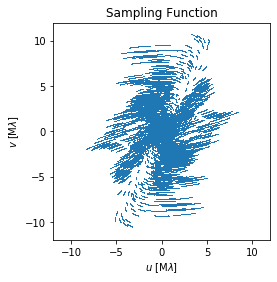

In [15]:
fig, axs = plt.subplots()
ax = axs
ax.plot(datavis.u * 1e-6, datavis.v * 1e-6, ',C0')
ax.plot(-datavis.u * 1e-6, -datavis.v * 1e-6, ',C0')
ax.set_aspect('equal')
ax.set_xlim([-12, 12])
ax.set_xlabel('$u$ [M$\\lambda$]')
ax.set_ylim([-12, 12])
ax.set_ylabel('$v$ [M$\\lambda$]')
ax.set_title('Sampling Function')

**Activity**: *Calculate* the minimum and maximum baseline lengths (think "spatial frequency distances") sampled with this dataset (try to do this without looking to later cells!).  *Estimate* what angular scales those correspond to, knowing the observing frequency is 240 GHz.  (Hint: an image's spatial coordinate is the inverse of the spatial frequency coordinate of its FT.)

In [ ]:
# your code here

Now let's look at the visibilities themselves, as a function of the projected baseline lengths:

Text(0, 0.5, 'imag($\\mathcal{V}$) [mJy]')

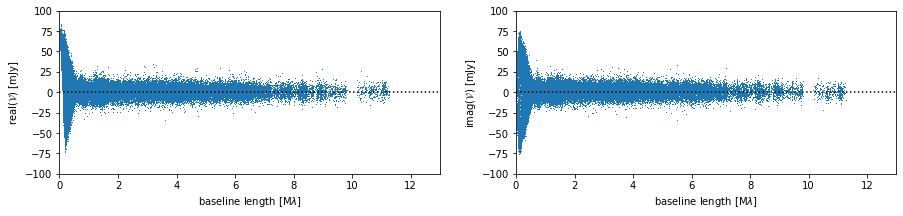

In [32]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 3))
ax = axs[0]
ax.plot(np.sqrt(datavis.u**2 + datavis.v**2) * 1e-6, 1e3 * datavis.vis.real, ',C0')
ax.plot([0, 15], [0, 0], ':k')
ax.set_xlim([0, 13])
ax.set_xlabel('baseline length [M$\\lambda$]')
ax.set_ylim([-100, 100])
ax.set_ylabel('real($\mathcal{V}$) [mJy]')

ax = axs[1]
ax.plot(np.sqrt(datavis.u**2 + datavis.v**2) * 1e-6, 1e3 * datavis.vis.imag, ',C0')
ax.plot([0, 15], [0, 0], ':k')
ax.set_xlim([0, 13])
ax.set_xlabel('baseline length [M$\\lambda$]')
ax.set_ylim([-100, 100])
ax.set_ylabel('imag($\mathcal{V}$) [mJy]')

Oof...this is *not* easy to look at.  One of the primary reasons why (aside from many individually noisy measurements) is something we already know from the first two parts of the project: the target source is not at the center of the field!  Let's try again, but now applying a shift to the visibilities (recall the shift theorem above, in the section on FT properties: a spatial shift in the image plane corresponds to a phase shift in the Fourier plane).  

Text(0, 0.5, 'imag($\\mathcal{V}$) [mJy]')

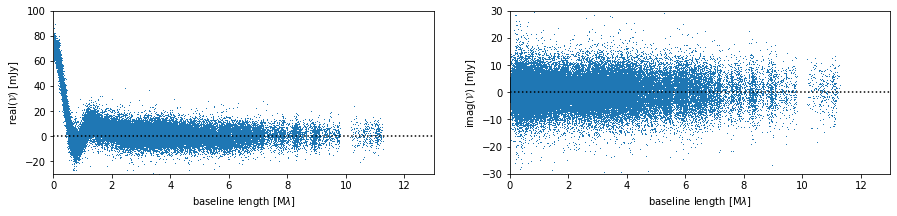

In [31]:
# phase shifts to account for offsets
offRA, offDEC = -0.060, -0.509
offx, offy = -offRA * np.pi / (180 * 3600), -offDEC * np.pi / (180 * 3600)
pshift = np.exp(-2 * np.pi * 1.0j * (datavis.u*-offx + datavis.v*-offy))
shifted_vis = datavis.vis * pshift

fig, axs = plt.subplots(ncols=2, figsize=(15, 3))
ax = axs[0]
ax.plot(np.sqrt(datavis.u**2 + datavis.v**2) * 1e-6, 1e3 * shifted_vis.real, ',C0')
ax.plot([0, 15], [0, 0], ':k')
ax.set_xlim([0, 13])
ax.set_xlabel('baseline length [M$\\lambda$]')
ax.set_ylim([-30, 100])
ax.set_ylabel('real($\mathcal{V}$) [mJy]')

ax = axs[1]
ax.plot(np.sqrt(datavis.u**2 + datavis.v**2) * 1e-6, 1e3 * shifted_vis.imag, ',C0')
ax.plot([0, 15], [0, 0], ':k')
ax.set_xlim([0, 13])
ax.set_xlabel('baseline length [M$\\lambda$]')
ax.set_ylim([-30, 30])
ax.set_ylabel('imag($\mathcal{V}$) [mJy]')

That's better!  Now you can see a distinct pattern in the reals, and that the imaginaries are essentially consistent with zero within the noise.  For a symmetric emission distribution centered in the field of view (i.e., one with only a radial variation, no azimuthal or vertical changes), the imaginaries should be negligible.  Or, put another way, the imaginary component of the visibilities is a good *tracer of asymmetry*.  We already learned in Part 2 that we don't see a lot of asymmetry (although note that these distributions are not a perfect representation, since they do not account for the projection of the disk onto the sky plane...more on that in Part 4).  

For the reals, we see that most of the power is on spatial frequencies $<$1 M$\lambda$ (common).  Again, in a symmetric case (properly deprojected), an extrapolation to a baseline length of zero (which is the same as a single-dish telescope collecting all the light) would provide the total flux of the source.  Here we can estimate that the SR 4 disk has a flux of roughly 70 mJy.  Perhaps the more telling feature in the reals are the oscillations we see at ~0.5-2 M$\lambda$.  Recall from above that you can get oscillations from both a *sharp* feature (e.g., the centered step function) and an offset peak feature (e.g., the offset step functions).  In this particular case, we know from the image that at least the latter feature is contributing there, from the emission "ring" we see outside the gap.

Another thing to note is that the signal-to-noise ratio for any individual visibility is pretty low: for most baselines $>$1 M$\lambda$, SNR $<$ 10.  We can show this directly as well, recalling the definition of the weights:

Text(0, 0.5, 'SNR imag')

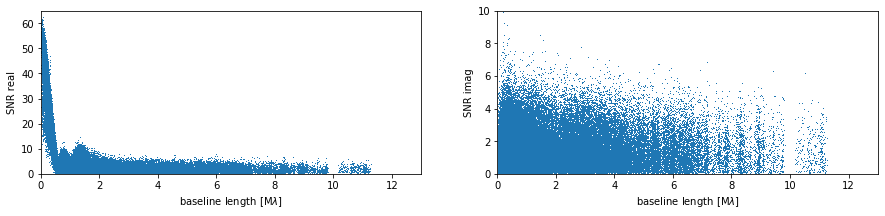

In [36]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 3))
ax = axs[0]
ax.plot(np.sqrt(datavis.u**2 + datavis.v**2) * 1e-6, np.abs(shifted_vis.real * np.sqrt(wgt)), ',C0')
ax.set_xlim([0, 13])
ax.set_xlabel('baseline length [M$\\lambda$]')
ax.set_ylim([0, 65])
ax.set_ylabel('SNR real')

ax = axs[1]
ax.plot(np.sqrt(datavis.u**2 + datavis.v**2) * 1e-6, np.abs(shifted_vis.imag * np.sqrt(wgt)), ',C0')
ax.set_xlim([0, 13])
ax.set_xlabel('baseline length [M$\\lambda$]')
ax.set_ylim([0, 10])
ax.set_ylabel('SNR imag')

That's ok though.  The important thing is that the visibilities are independent measurements with well-defined (approximately Gaussian) uncertainties.  This is **not** true for the individual pixels in an image, and therefore also not true for a radial intensity profile we construct from an image.  In an image (we'll discuss how that's made below), neighboring pixels have correlated signal and noise, due to their convolution by the point-spread function.  So the pixel values and uncertainties are not independent: modeling them directly requires a complicated model of their covariances.  Moreover, an image does not really permit us to associate an uncertainty with individual pixel values.  We can only really characterize a global noise level in the image.  Finally, as you'll see below, these images are not unique representations of the data!  So, in general we ought to model visibilities, not images.  (The caveat is that this only really works well if the emission distribution is relatively simple...images are not without their uses!)

## Imaging

I've already discussed how the intensity distribution on the sky and the visibilities are a Fourier transform pair.  But the reality is more complicated, primarily because we only sample the visibilities at a discrete collection of spatial frequencies (characterized by the Sampling Function discussed above).  So, let me break down the more realistic situation more directly.  The observed visibilities $V_\nu(u, v)$ are actually the product of the sampling function $S(u, v)$ and the "true" visibility function $\mathcal{V}_\nu(u, v)$,

$V_\nu(u, v) = S(u, v) \, \times \, \mathcal{V}_\nu(u, v)$.

In our jargon, we refer to the (inverse) FT of the observed visibilities as the "dirty image", $I_\nu^D(l, m)$.  Using the convolution theorem of Fourier transforms, the dirty image is the convolution of the true image with the dirty beam, $s(l, m)$, also referred to as the point-spread function (PSF) or "synthesized" beam, which is the FT of the Sampling Function:

$I_\nu^D(l, m) = s(l, m) \, \ast \, I_\nu(l, m)$, where $S(u, v) \,\, ^\mathcal{F}_\rightarrow \,\, s(l, m)$.

To try and reproduce a model representation of the "true" image, we use a (non-linear) deconvolution algorithm.  The most common of these is called ${\tt clean}$.  It essentially postulates that a "clean" model image representation of the true image can be constructed from a collection of point sources (with different locations and intensities).  The procedure is outlined clearly on slides 52-65 in [this presentation](https://drive.google.com/file/d/1cB7_B3NtOt2HcnVWbgQ2lvKMkIGJKt_r/view).  That "clean" image is what you've worked with so far.

Just to fortify the points in that presentation with our own example, we can look at the dirty image, clean model, PSF, and residuals for the SR 4 data:

In [37]:
import os, sys, time           # I basically always load these in every code I write.
import numpy as np             # Numpy is the basic numerics package in Python.
from astropy.io import fits    # .FITS file manipulation package  
import urllib.request          # package for fetching files off the internet
import matplotlib.pyplot as plt    # plotting package
from matplotlib.patches import Ellipse    # plotting package
import cmasher as cmr          # color maps
from astropy.visualization import (AsinhStretch, LogStretch, ImageNormalize)    # image visualization functions
%matplotlib inline                

# disk target name
disk_name = 'SR4'

# set this to your project directory (or however you like)
working_dir = '/Users/sandrews/Desktop/DSHARP_CPDs/'

# if you don't already have the datafiles, download them
if not os.path.exists(working_dir+disk_name+'_continuum.model.fits'):
    dsharp_url = 'http://www.cfa.harvard.edu/~sandrews/data/'+disk_name+'_continuum.model.fits'
    print('Downloading .FITS image...')
    urllib.request.urlretrieve(dsharp_url, working_dir+disk_name+'_continuum.model.fits')
    print('...Download complete.')
if not os.path.exists(working_dir+disk_name+'_continuum.psf.fits'):
    dsharp_url = 'http://www.cfa.harvard.edu/~sandrews/data/'+disk_name+'_continuum.psf.fits'
    print('Downloading .FITS image...')
    urllib.request.urlretrieve(dsharp_url, working_dir+disk_name+'_continuum.psf.fits')
    print('...Download complete.')
if not os.path.exists(working_dir+disk_name+'_continuum.residuals.fits'):
    dsharp_url = 'http://www.cfa.harvard.edu/~sandrews/data/'+disk_name+'_continuum.residual.fits'
    print('Downloading .FITS image...')
    urllib.request.urlretrieve(dsharp_url, working_dir+disk_name+'_continuum.residual.fits')
    print('...Download complete.')
if not os.path.exists(working_dir+disk_name+'_continuum.dirty.fits'):
    dsharp_url = 'http://www.cfa.harvard.edu/~sandrews/data/'+disk_name+'_continuum.dirty.fits'
    print('Downloading .FITS image...')
    urllib.request.urlretrieve(dsharp_url, working_dir+disk_name+'_continuum.dirty.fits')
    print('...Download complete.')

...Download complete.
...Download complete.
...Download complete.
...Download complete.


**Activity**: Following what you've done already in Part 1 for plotting images, make a gallery of these images.  The units and ranges in each image may not be the same (e.g., the PSF goes from 0 to 1), but some experimenting with image stretches, etc. will illustrate some of the finer points.  Include the final "clean"ed image from Part 1 as well.

In [ ]:
# your code here